# 03 · Sequential Agent

Exercise 3


In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [7]:
class AgentState(TypedDict):
    name : str
    age : int
    skills : list[str]
    final : str

def first_node(state: AgentState) -> AgentState:
    state["final"] = state["name"] + ", welcome to the system! "
    return state

def second_node(state: AgentState) -> AgentState:
    age = state["age"]
    if age > 1:
        state["final"] = state["final"] + "You are " + str(age) + " years old! "
    elif age == 1:
        state["final"] = state["final"] + "You are " + str(age) + " year old! "
    return state

def third_node(state: AgentState) -> AgentState:
    n = len(state["skills"])
    if n == 1:
        state["final"] = state["final"] + "You have skills in: " + state["skills"][0]
    elif n == 2:
        state["final"] = state["final"] + "You have skills in: " + state["skills"][0] + " and " + state["skills"][1]
    else:
        state["final"] = state["final"] + "You have skills in: "
        for i in range(n - 1):
            state["final"] = state["final"] + state["skills"][i] + ", "
        state["final"] = state["final"] + "and " + state["skills"][n - 1]
    return state

In [8]:
graph = StateGraph(AgentState)

graph.add_node("first_node", first_node)
graph.add_node("second_node", second_node)
graph.add_node("third_node", third_node)

graph.set_entry_point("first_node")
graph.add_edge("first_node", "second_node")
graph.add_edge("second_node", "third_node")
graph.set_finish_point("third_node")

app = graph.compile()

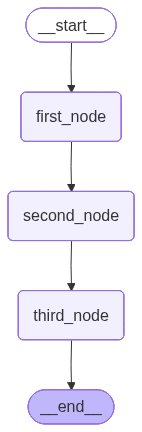

In [9]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [10]:
result = app.invoke({"name": "Bob", "age": 1, "skills": ["python"]})
result["final"]

'Bob, welcome to the system! You are 1 year old! You have skills in: python'

In [11]:
result = app.invoke({"name": "Bob", "age": 2, "skills": ["python", "c++"]})
result["final"]

'Bob, welcome to the system! You are 2 years old! You have skills in: python and c++'

In [12]:
result = app.invoke({"name": "Alex", "age": 35, "skills": ["python", "c++", "javascript", "java"]})
result["final"]

'Alex, welcome to the system! You are 35 years old! You have skills in: python, c++, javascript, and java'